# 0/ Download the data

In [1]:
!wget https://raw.githubusercontent.com/the0nlyWyvern/Top_tracks_in_Vietnam/main/data/cleanedData/top_tracks_by_artist_cleaned.csv

--2023-01-30 09:11:38--  https://raw.githubusercontent.com/the0nlyWyvern/Top_tracks_in_Vietnam/main/data/cleanedData/top_tracks_by_artist_cleaned.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200941 (196K) [text/plain]
Saving to: ‘top_tracks_by_artist_cleaned.csv’

top_tracks_by_artis 100%[===================>] 196.23K  --.-KB/s    in 0.03s   

2023-01-30 09:11:38 (6.90 MB/s) - ‘top_tracks_by_artist_cleaned.csv’ saved [200941/200941]



# 1/ Library

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt

# 2/ Load data into dataframe

In [3]:
tracks_df = pd.read_csv('top_tracks_by_artist_cleaned.csv')
tracks_df.head(10)

,id,name,artist,artist_followers,artist_genres,album,release_date,album_total_tracks,duration,explicit,popularity
0,2QeCJM7ZmVS8xwjjaHahhv,Tân Cổ Cánh Hoa Yêu,Vọng Cổ Việt Nam,88,[],Tân Cổ Cánh Hoa Yêu,2021-05-11,1,461,False,15
1,4qlh8lE1HAK9QhO6hYpu9A,Tân Cổ Ru Nửa Vầng Trăng,Vọng Cổ Việt Nam,88,[],Tân Cổ Ru Nửa Vầng Trăng,2021-01-11,1,517,False,11
2,0W5IsXzhv7l690pNXLQFeM,Tân Cổ Sao Út Nỡ Vội Lấy Chồng,Vọng Cổ Việt Nam,88,[],Tân Cổ Sao Út Nỡ Vội Lấy Chồng,2021-01-11,1,530,False,10
3,6JEJawcNecNh6W1fb4a6qE,Tân Cổ Con Đò Lỡ Hẹn,Vọng Cổ Việt Nam,88,[],Tân Cổ Con Đò Lỡ Hẹn,2021-10-11,1,558,False,10
4,5k0wsqLadgNbxv5nNl0tlb,Tân Cổ Buồn Trong Kỷ Niệm,Vọng Cổ Việt Nam,88,[],Tân Cổ Buồn Trong Kỷ Niệm,2021-10-11,1,556,False,9
5,0eRW4f7LcCabJp4fX0fQC9,Tân Cổ Chim Trắng Mồ Côi,Vọng Cổ Việt Nam,88,[],Tân Cổ Chim Trắng Mồ Côi,2021-10-11,1,539,False,9
6,400fPjt1lvxA4FR0DFUFaG,Tân Cổ Quán Nửa Khuya,Vọng Cổ Việt Nam,88,[],Tân Cổ Quán Nửa Khuya,2021-01-11,1,510,False,9
7,3MfHtLePUP5TXStdkM7MRT,Tân Cổ Đêm Mơ Em Hát Dân Ca,Vọng Cổ Việt Nam,88,[],Tân Cổ Đêm Mơ Em Hát Dân Ca,2021-10-11,1,527,False,8
8,7Mz5K15plDojVhCoHmMovg,Tân Cổ Tiền Thắng Tình Thua,Vọng Cổ Việt Nam,88,[],Tân Cổ Tiền Thắng Tình Thua,2021-01-11,1,455,False,8
9,1TPQApxiS5nzKdleTnU1L1,Trích Đoạn Máu Nhuộm Sân Chùa,Vọng Cổ Việt Nam,88,[],Trích Đoạn Máu Nhuộm Sân Chùa,2021-10-11,1,698,False,7


## 2.1/ Change column data type

In [4]:
tracks_df.dtypes

id                    object
name                  object
artist                object
artist_followers       int64
artist_genres         object
album                 object
release_date          object
album_total_tracks     int64
duration               int64
explicit                bool
popularity             int64
dtype: object

In [5]:
tracks_df['release_date'] = pd.to_datetime(tracks_df['release_date'], format='%Y-%m-%d')
tracks_df['artist_genres'] = tracks_df['artist_genres'].apply(literal_eval)

In [6]:
tracks_df.dtypes

id                            object
name                          object
artist                        object
artist_followers               int64
artist_genres                 object
album                         object
release_date          datetime64[ns]
album_total_tracks             int64
duration                       int64
explicit                        bool
popularity                     int64
dtype: object

# 3/ Question 3: What are the songs that have been released for a long time but are still heard by many people at the present time?

Benefits of answering this question: 
- Find songs that are really good, have catchy tunes, and make many people continue to listen to them again and again until now.

## 3.1/ Gets songs released at least 2 years ago, i.e. songs released before 2021.

In [7]:
tracks_old_df = tracks_df[tracks_df['release_date'].apply(lambda x : int(x.year) <= 2021)]
tracks_old_df.head(10)

,id,name,artist,artist_followers,artist_genres,album,release_date,album_total_tracks,duration,explicit,popularity
0,2QeCJM7ZmVS8xwjjaHahhv,Tân Cổ Cánh Hoa Yêu,Vọng Cổ Việt Nam,88,[],Tân Cổ Cánh Hoa Yêu,2021-05-11,1,461,False,15
1,4qlh8lE1HAK9QhO6hYpu9A,Tân Cổ Ru Nửa Vầng Trăng,Vọng Cổ Việt Nam,88,[],Tân Cổ Ru Nửa Vầng Trăng,2021-01-11,1,517,False,11
2,0W5IsXzhv7l690pNXLQFeM,Tân Cổ Sao Út Nỡ Vội Lấy Chồng,Vọng Cổ Việt Nam,88,[],Tân Cổ Sao Út Nỡ Vội Lấy Chồng,2021-01-11,1,530,False,10
3,6JEJawcNecNh6W1fb4a6qE,Tân Cổ Con Đò Lỡ Hẹn,Vọng Cổ Việt Nam,88,[],Tân Cổ Con Đò Lỡ Hẹn,2021-10-11,1,558,False,10
4,5k0wsqLadgNbxv5nNl0tlb,Tân Cổ Buồn Trong Kỷ Niệm,Vọng Cổ Việt Nam,88,[],Tân Cổ Buồn Trong Kỷ Niệm,2021-10-11,1,556,False,9
5,0eRW4f7LcCabJp4fX0fQC9,Tân Cổ Chim Trắng Mồ Côi,Vọng Cổ Việt Nam,88,[],Tân Cổ Chim Trắng Mồ Côi,2021-10-11,1,539,False,9
6,400fPjt1lvxA4FR0DFUFaG,Tân Cổ Quán Nửa Khuya,Vọng Cổ Việt Nam,88,[],Tân Cổ Quán Nửa Khuya,2021-01-11,1,510,False,9
7,3MfHtLePUP5TXStdkM7MRT,Tân Cổ Đêm Mơ Em Hát Dân Ca,Vọng Cổ Việt Nam,88,[],Tân Cổ Đêm Mơ Em Hát Dân Ca,2021-10-11,1,527,False,8
8,7Mz5K15plDojVhCoHmMovg,Tân Cổ Tiền Thắng Tình Thua,Vọng Cổ Việt Nam,88,[],Tân Cổ Tiền Thắng Tình Thua,2021-01-11,1,455,False,8
9,1TPQApxiS5nzKdleTnU1L1,Trích Đoạn Máu Nhuộm Sân Chùa,Vọng Cổ Việt Nam,88,[],Trích Đoạn Máu Nhuộm Sân Chùa,2021-10-11,1,698,False,7


Sort songs by popularity

In [8]:
sorted_df = tracks_old_df.sort_values(by = 'popularity', ascending = False).reset_index(drop = True)
sorted_df = sorted_df[['name', 'artist', 'release_date', 'popularity']].drop_duplicates(subset = ['name', 'release_date']).reset_index(drop = True)
sorted_df.head(20)

,name,artist,release_date,popularity
0,bao tiền một mớ bình yên?,Bon Nghiêm,2020-01-01,65
1,Ánh Sao Và Bầu Trời,T.R.I,2021-09-10,64
2,Thích Em Hơi Nhiều,Wren Evans,2021-06-18,63
3,Chúng Ta Của Hiện Tại,Sơn Tùng M-TP,2020-12-20,63
4,Đi Về Nhà,JustaTee,2020-12-20,63
5,Sinh Ra Đã Là Thứ Đối Lập Nhau (feat. Badbies),Da LAB,2020-12-29,62
6,Sài Gòn Hôm Nay Mưa,JSOL,2021-05-29,61
7,3107 3,W/N,2021-07-31,61
8,CHẠY NGAY ĐI - Onionn Remix,Sơn Tùng M-TP,2018-07-05,61
9,Cứ Chill Thôi,Chillies,2020-07-11,61


Text(0.5, 1.0, 'Top 20 most listened songs at the moment')

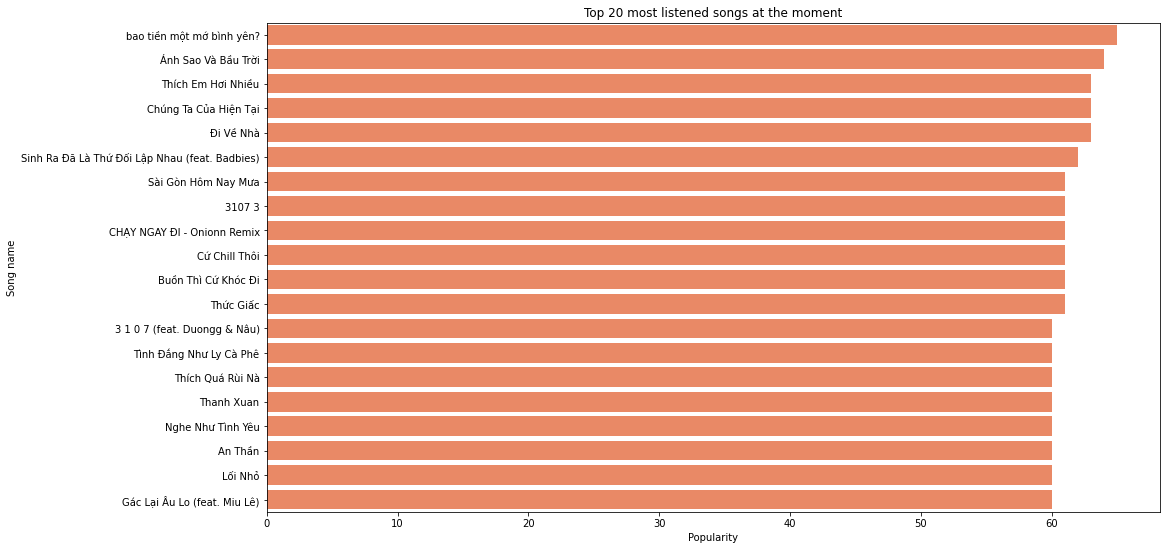

In [9]:
fig,ax = plt.subplots(figsize = (16,9))
sns.barplot(data = sorted_df.head(20), x = 'popularity', y = 'name', ax = ax, color = 'coral')
ax.set_xlabel('Popularity')
ax.set_ylabel('Song name')
ax.set_title('Top 20 most listened songs at the moment')

# 4/ Question 4: For each song length, what is the average popularity score of the songs?

Benefits of answering this question: 
- Help us figure out what is the ideal length for a song that could easily become famous. Based on that, artists can compose songs with lengths suitable for listeners' needs.

We will divide the length of a song into intervals, with each interval being 1 minute:
- 0-1 minute
- 1-2 minutes
- 2-3 minutes
- 3-4 minutes
- ...

Since the song length in the data set is saved in seconds, each interval will correspond to 60 seconds.

In [10]:
longest_duration = tracks_df['duration'].max()
bins = np.arange(0, longest_duration+1,60)
labels = ['{}-{}'.format(bins[i]//60,bins[i+1]//60) for i in range(len(bins)-1)]

Calculate the average popularity of songs for each song length

In [11]:
cut = pd.cut(tracks_df['duration'], bins = bins, labels = labels)
popu_by_dur_df = tracks_df.groupby(cut)['popularity'].mean().to_frame(name = 'avg_popularity').reset_index()
popu_by_dur_df['avg_popularity'] = popu_by_dur_df['avg_popularity'].fillna(0).round(2)
popu_by_dur_df

,duration,avg_popularity
0,0-1,28.75
1,1-2,29.58
2,2-3,33.72
3,3-4,35.95
4,4-5,34.91
5,5-6,31.53
6,6-7,14.95
7,7-8,17.50
8,8-9,12.00
9,9-10,26.25


Text(0, 0.5, 'Avg. popularity')

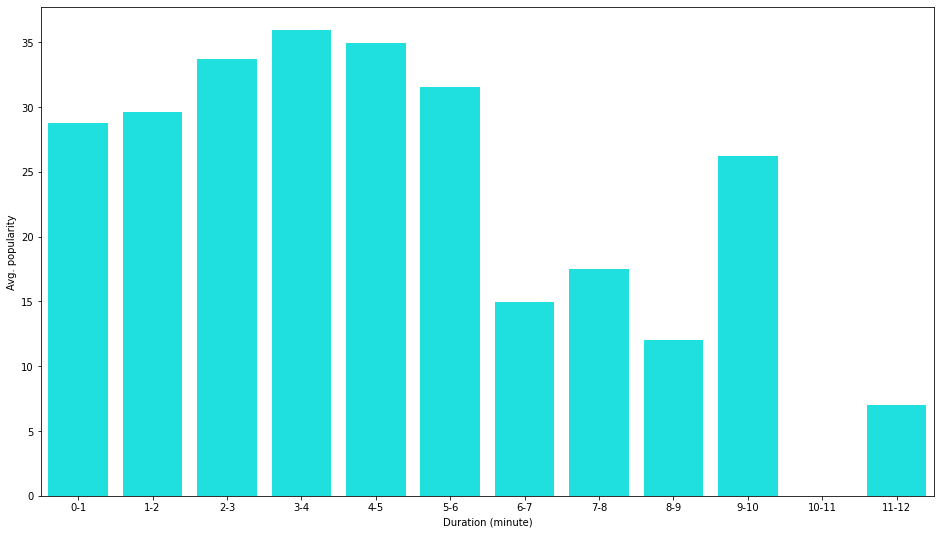

In [12]:
fig,ax = plt.subplots(figsize = (16,9))
sns.barplot(data = popu_by_dur_df, x = 'duration', y = 'avg_popularity', ax = ax, color = 'cyan')
ax.set_xlabel('Duration (minute)')
ax.set_ylabel('Avg. popularity')

## 4.1/ Comment
Songs that are 3-4 minutes long have the highest average popularity, second is the 4-5 minute range, followed by 2-3 minutes. We can somewhat conclude that the ideal length for a song is between 2-5 minutes.